In [8]:
import sys, threading
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import math
sys.setrecursionlimit(10 ** 7)
threading.stack_size(2 ** 27)
random.seed(time.time())

TODOS
- Revise methods that are completely "plagiarised"
- Need a method to distrubute Keys
- Need to divide messages to blocks according to key length
- Implement Essam's revision of the brute force attack
- Implement chosen ciphertext attack

DONE
- Copied from number theory: 
  - GCD - Extended Euclid - Modular Exponentiation - Modular Inverse - Convert to Int - Convert to String - Encrypt - Decrypt
- Generate random numbers of n binary bits
- Primality Check
- The two above points are responsible for public keys
- Generate private keys from public keys


In [9]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)

def extendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = extendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

def modularExponentiate(a, n, mod):
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod

    f = 1
    binaryB = bin(n)[2:]
    for i in range(len(binaryB)):
        f = (f*f) % mod
        if binaryB[i] == '1':
            f = (f * a) % mod
    return f

def modularInverse(a, n):
    (b, x) = extendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n  
    return b

def ConvertToInt(message_str):  
    res = 0
    for i in range(len(message_str)):
        res = res * 256 + ord(message_str[i])
    return res

    

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def Encrypt(m, e, n):
    m = ConvertToInt(m)
    c = modularExponentiate(m,e,n)
    return c

def getPublicKey(phi_n):
    e = random.randrange(1,phi_n)
    while e < 1 or GCD(e,phi_n) != 1:
        e = random.randrange(1,phi_n)
    return e


def getPrivateKey(e,p,q):
    phi_n = (p - 1) * (q - 1)
    d = modularInverse(e, phi_n)
    return d

def Decrypt(c, d, p, q):
    m = modularExponentiate(c, d, p * q)
    m = ConvertToStr(m)
    return m

def divideMsg(msg,n):
    msg_blocks=[]
    begin = 0
    msg_len = len(msg)
    step = math.floor(math.log(n,256))
    if(msg_len > math.log(n,256)): #need to divide
        for start in range(begin,len(msg),step):
            if(start + step > len(msg)-1):
                msg_blocks.append(msg[start:])
            else: msg_blocks.append(msg[start:start+step])   
    else: msg_blocks = msg
    return msg_blocks



In [10]:
msg = """The first parameter to the RSA_public_encrypt function is flen.
 This is an integer that indicates the number of bytes to encrypt. 
 Its maximum value depends on the padding mode. For OAEP padding, 
 recommended for all new applications, 
 it must be less than the size of the key modulus - 41 (all in bytes)."""

n= 1000000007*1000000009
exponent = 23917
msg_chunks = divideMsg(msg,n)
cipher = [Encrypt(msg,exponent,n) for msg in msg_chunks]
print(cipher)
d = getPrivateKey(exponent,1000000007,1000000009)
message = [Decrypt(chunk,d,1000000007,1000000009) for chunk in cipher]
message = "".join(message)
print(message)
# str_chunks = msgChunkstoStr(msg,1000000007*1000000009)
# print(msg_chunks)


[545407027012337210, 140138448310794244, 586632171867499373, 150773989291246687, 90206090575387410, 346144594830328031, 526787944612136323, 32043488179070983, 300308804791579499, 589084185687612815, 689350062235174026, 495118818849760350, 441558611448038523, 169281203905014598, 725170831604229174, 563323578393600203, 252233968779573367, 9384789486323315, 697143697074365736, 240919643461172605, 394724649637264938, 194398439479096699, 209546149168860946, 74586264609404399, 660847284627315052, 157085043955398849, 645328515269345835, 532282472631482948, 83550430334733479, 950955495778456552, 597945674764268191, 62978520531728269, 612462401259621182, 769181592361684937, 4362237859562937, 678298027852566455, 883411298552433348, 756627115317874792, 966271134188056770, 922526108925631374, 267398852386021380, 513141996747024088, 510179915860826697, 508729187388365250, 323673783953008287]
The first parameter to the RSA_public_encrypt function is flen.
 This is an integer that indicates the numbe

In [11]:
#simple test
p = 1000000007
q = 1000000009
msg = """The first parameter to the RSA_public_encrypt function is flen.
 This is an integer that indicates the number of bytes to encrypt. 
 Its maximum value depends on the padding mode. For OAEP padding, 
 recommended for all new applications, 
 it must be less than the size of the key modulus – 41 (all in bytes)."""
exponent = 23917
modulo = p * q
# msg = checkMsgLen (msg,modulo)
# # maxChunk = max([ConvertToInt(chunk) for chunk in msg])
# print(msg)
# ciphertext = [Encrypt(chunk, exponent, modulo)for chunk in msg]
# print(ciphertext)
# d = getPrivateKey(exponent,p,q)
# message = [Decrypt(chunk, d, p, q) for chunk in ciphertext]
# print(message)

# x = bin(modulo)[2:] #bin return 0bxx, sliced from position 2to get rid of 0b
# print(len(x))

# a = modularExponentiate(55,97,1234)
# b = revisedModExpo(55,97,1234)
# print(a,b)


In [12]:
"""
Parameter generation
on sign up generate large numbers of preferably 512 bits to be used as p and q
then generate random e such that gcd(e,phi(n)) = 1
e can be generated using nBitRandom then checking using GCD that the result is 1
d is the modular inverse of e mod(phi(n))
"""

#generating p and q
#https://www.geeksforgeeks.org/how-to-generate-large-prime-numbers-for-rsa-algorithm/
def nBitRandom(n):
    return random.getrandbits(n) + (2**(n-1)+1)
    

def fermatPrimalityTest(p):
    """
    a:random integer
    p:the number to test if prime or not
    """
    if p <= 1: return False
    for _ in range(1,102):
        # a=np.random.randint(1,p,dtype=np.int64)
        a=random.randint(1,p+1)
        aPowP = modularExponentiate(a,p,p)
        if (aPowP - a) % p != 0: return False
    return True



In [13]:
"""
Brute force attack
you need to factorize large n into 2 prime factors
factorization of n is unique, once you find 2 primes ur done

"""
# brute force attack

#responsible for factorization
def bruteForceAttack(n):
    #remember the properties of factorization, we only need to try up till square root of n
    for i in range(2,int(np.sqrt(n))+1):
        if n % i == 0:
            return i

In [14]:
# Generate prime numbers less than N
def generatePrimeNumbers(N):
    # Returns a list of prime numbers less than N
    primeNumbers = []
    for i in range(2, N):
        if fermatPrimalityTest(i):  # Fermat's primality test
            primeNumbers.append(i)
    return primeNumbers

def generatePrime(n):
    if n == 1: return -1
    number = 1 
    while not fermatPrimalityTest(number):
        number = nBitRandom(n)
    return number

def generatePrimeModuli(n):
    p = 1
    q = 1
    nArray = []
    for i in range(2,int(n/2)+1):
        p = generatePrime(i)
        q = generatePrime(i)
        while p==q:
            q = generatePrime(i)
        nArray.append(p*q)
    return nArray
    


In [15]:
def testBruteForceTime(N):
    time_taken = []
    n_values =[]
    # Test the time it takes to brute force attack
    primeNumbers = generatePrimeNumbers(N) # Generate prime numbers less than N
    for i in range(len(primeNumbers)):
        for j in range(i+1, len(primeNumbers)):
            n_val =primeNumbers[i]*primeNumbers[j] # n = p*q
            n_values.append(n_val)
            start_time = time.time()
            bruteForceAttack(n_val) # Brute force attack
            end_time = time.time()
            time_taken.append(end_time - start_time) # Time taken to brute force attack
    return time_taken , n_values

In [61]:
def parametersTxtFile(n):
    p = 1
    q = 1
    nArray = []
    tab = '\t\t\t\t\t\t'
    file = open("parameters.txt",'w')  # write in text mode
    file.write(f"p{tab}q{tab}n{tab}phi_n\n")
    for i in range(2,int(n/2)+1):
        p = generatePrime(i)    
        q = generatePrime(i)    
        while p==q:
            q = generatePrime(i)
        n = p*q
        phi_n = (p-1)*(q-1)
        file.write(f"p{tab}q{tab}n{tab}phi_n\n")
    file.close()


In [63]:
def generateParamsConstE():
    nparr_n = []
    nparr_phi = []
    e = 7
    for i in range(3,50):
        p = generatePrime(i)
        q = generatePrime(i)
        # n = p * q
        phi_n = (p-1)*(q-1)
        while p == q or GCD(e,phi_n)!=1 or e>=phi_n:
            q = generatePrime(i)
            phi_n = (p-1)*(q-1)
        n = p*q
        print(n, phi_n)
        nparr_n.append(n)
        nparr_phi.append(phi_n)
    np.save('constE_n.npy',nparr_n,allow_pickle=True)
    np.save('constE_phi.npy',nparr_phi,allow_pickle=True)

# generateParamsConstE()
# arr1 = np.load('./constE_n.npy',allow_pickle=True)
# arr2= np.load('./constE_phi.npy',allow_pickle=True)
# print(arr1)
# print(arr2)


77 60
143 120
1081 1012
3233 3120
26671 26344
43507 43056
262063 261040
705311 703632
3722909 3719040
13274113 13266388
55187147 55171896
270087341 270054300
765086611 765029152
1990682713 1990592820
6401625667 6401464056


KeyboardInterrupt: 

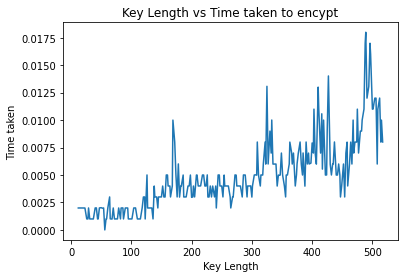

In [66]:
def encryptionTime(N):
    time_taken = []
    moduli =[]
    phi_ns=[]
    message = """
    This is a graph of time vs key length
    In this function, e is constant while phi_n is changing
    """
    # Test the time it takes to brute force attack
    # for i in range(2,int(n/2)+1):
    #     p = generatePrime(i)
    #     q = generatePrime(i)
    #     while p==q:
    #         q = generatePrime(i)
    #     moduli.append(p*q)
    #     phi_ns.append((p-1)*(q-1))
    moduli = np.load('./n_arr.npy',allow_pickle=True)
    es = np.load('./e_arr.npy',allow_pickle=True)

    # for i in range(len(moduli)):
    for i in range(2,N):
        msg_blocks = divideMsg(message,moduli[i])
        start_time = time.time()
        # for _ in range(1000):
        #     Encrypt(message,es[i],moduli[i])
        encypted_msg = [Encrypt(block,es[i],moduli[i])for block in msg_blocks]
        end_time = time.time()
        time_taken.append(end_time - start_time) # Time taken to brute force attack
    return time_taken , moduli[2:N]

# times, moduli = encryptionTime(256)
# moduli = [len(bin(modulus)[2:]) for modulus in moduli]
# plt.plot(moduli, times)
# plt.xlabel('Key Length')
# plt.ylabel('Time taken')
# plt.title('Key Length vs Time taken to encypt')
# plt.show()

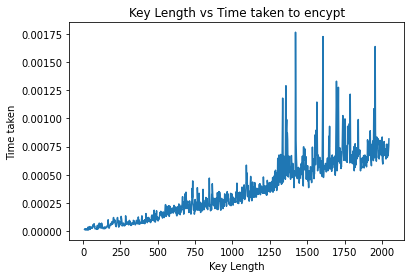

In [75]:
def encryptionTimeConstE(n):
    time_taken = [] 
    message = """
    This is a comparison of time against key length. 
    This should be a very long message so I'm increasing its length.
    In this function, e is constant while phi_n is changing
    """*10
    es = np.load('./encryptionVSkey/e_arr_e.npy',allow_pickle=True)
    moduli = np.load('./encryptionVSkey/n_arr_e.npy',allow_pickle=True)
    for i in range(1,n):
        msg_blocks = divideMsg(message,moduli[i])
        start_time = time.time()
        for _ in range(200):
            # encypted_msg = [Encrypt(block,es[i],moduli[i])for block in msg_blocks]
            encypted_msg = Encrypt(msg_blocks[0],es[i],moduli[i])
        end_time = time.time()
        time_taken.append((end_time - start_time)/200) # Time taken to brute force attack
    return moduli[1:n],time_taken

es = np.load('./encryptionVSkey/e_arr_e.npy',allow_pickle=True)
moduli, times = encryptionTimeConstE(len(es))
moduli = [len(bin(modulus)[2:]) for modulus in moduli]
plt.plot(moduli, times)
plt.xlabel('Key Length')
plt.ylabel('Time taken')
plt.title('Key Length vs Time taken to encypt')
plt.show()